# Promedio estacional ERA5

## Importamos librerías necesarias

In [2]:
import sys
import pandas as pd
import numpy as np
import glob

## Adicionar los archivos .nc

En esta parte adicionamos el camino de todo los archivos .nc usando **`glob`**

In [3]:
files = sorted(glob.glob('../../data/*.nc'))
len(files)

61

Importamos la librería **`xarray`**

In [4]:
import xarray as xr

Ahora vamos a leer todas los archivos **.nc**

In [5]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, time: 732)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Data variables:
    z          (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-31 14:04:05 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Veamos cómo están organizados los **.nc**!!

## Promedio estacional

In [6]:
ds = ds.groupby('time.season').mean('time')
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, season: 4)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    z          (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    u10        (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    v10        (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    t2m        (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>
    tp         (season, latitude, longitude) float32 dask.array<chunksize=(1, 89, 81), meta=np.ndarray>

Veamos cómo están organizados los **.nc**!!

## Vamos importar algunas funciones de **`cartopy`** y **`geocat.viz`**

In [7]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cartopy import feature as cf

import geocat.viz as gv

Podemos visualizar la variable temperatura!

In [8]:
ds['t2m']

<xarray.DataArray 't2m' (season: 4, latitude: 89, longitude: 81)>
dask.array<concatenate, shape=(4, 89, 81), dtype=float32, chunksize=(1, 89, 81), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

## Seleccionamos las variables de temperatura y viento para cada estación

Recuerda que el verano está en la posición 0, otoño en la posición 2, invierno en la posición 1 y primavera en la posición 3.

In [9]:
DEF = ds['t2m'][0]-273.16
MAM = ds['t2m'][2]-273.16
JJA = ds['t2m'][1]-273.16
SON = ds['t2m'][3]-273.16

UDEF = ds['u10'][0]
VDEF = ds['v10'][0]

UMAM = ds['u10'][2]
VMAM = ds['v10'][2]

UJJA = ds['u10'][1]
VJJA = ds['v10'][1]

USON = ds['u10'][3]
VSON = ds['v10'][3]

lat = ds['latitude']
lon = ds['longitude']
lon, lat = np.meshgrid(lon, lat)

## Hacemos nuestra figura de campos de temperatura

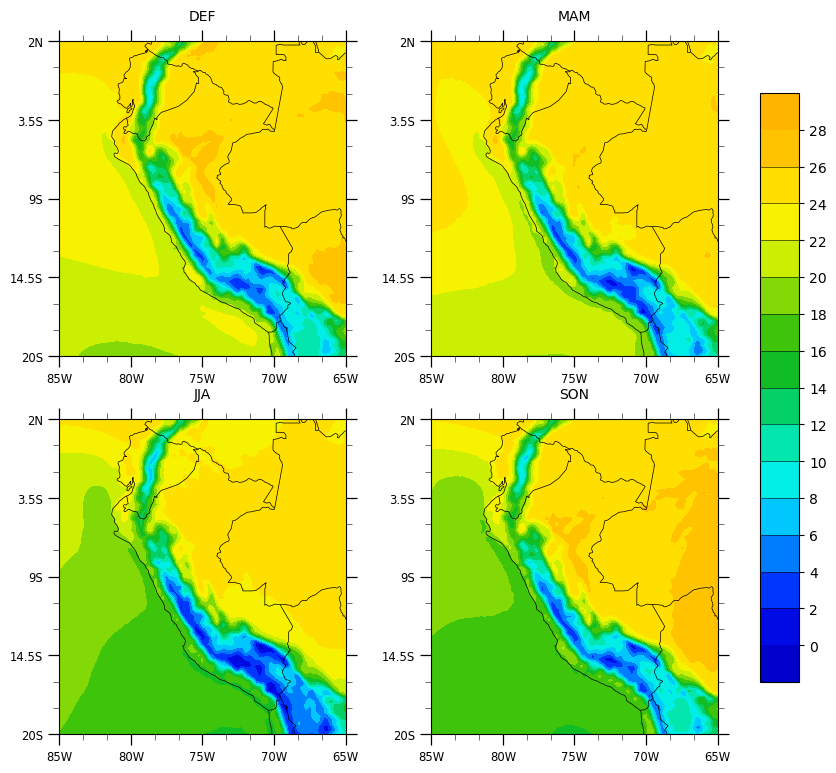

In [10]:
fig = plt.figure(figsize=(11, 9))

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# Seleccionamos la proyección de nuestro mapa
proj = ccrs.PlateCarree()

# Agregar las subfiguras
ax1 = fig.add_subplot(grid[0, 0], projection=proj)  # 
ax2 = fig.add_subplot(grid[0, 1], projection=proj)  # 
ax3 = fig.add_subplot(grid[1, 0], projection=proj)  # 
ax4 = fig.add_subplot(grid[1, 1], projection=proj)  # 

for (ax, title) in [(ax1, 'DEF'), (ax2, 'MAM'), (ax3, 'JJA'), (ax4, 'SON')]:
    # Use la función de geocat.viz.util para establecer los valores de marca de los ejes
    gv.set_axes_limits_and_ticks(ax=ax,
                                 xlim=(lon.min(), lon.max()),
                                 ylim=(lat.min(), lat.max()),
                                 xticks=np.linspace(lon.min(), lon.max(), 5),
                                 yticks=np.linspace(lat.min(), lat.max(), 5))

    # Usamos la función geocat.viz.util para hacer que los gráficos se vean como NCL
    # gráficos usando etiquetas de marca de latitud y longitud
    gv.add_lat_lon_ticklabels(ax)

    # Eliminar el símbolo de grado de las etiquetas de marca
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    # Usamos la función de geocat.viz.util para agregar marcas menores y mayores
    gv.add_major_minor_ticks(ax)

    # Agregar las lines de costa
    ax.add_feature(cf.BORDERS, edgecolor='k', linewidth=0.5)
    ax.coastlines(linewidth=0.5, edgecolor='k')

    # Agregar título central
    ax.set_title(title, loc='center', y=1.04, fontsize=10)

# Select an appropriate colormap
#cmap = 'magma'
import cmaps
# Importando la base del colormap para trabajar
cmap = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                            minval=0.1,
                            maxval=0.6,
                            n=len(np.arange(0, 30, 2)))

# Agregamos los campos de temperatura

C = ax1.contourf(lon,
                 lat,
                 DEF.values,
                 levels=np.arange(0, 30, 2),
                 cmap=cmap,
                 extend='both')

ax2.contourf(lon,
             lat,
             MAM.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax3.contourf(lon,
             lat,
             JJA.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax4.contourf(lon,
             lat,
             SON.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

# Agregamos el colorbars
# Al especificar dos ejes para `ax`, la barra de colores abarcará ambos
plt.colorbar(C,
             ax=[ax1, ax2, ax3, ax4],
             ticks=range(0, 30, 2),
             extendrect=True,
             extendfrac='auto',
             shrink=0.85,
             aspect=15,
             drawedges=True)

fig.savefig('fig/Temp_estacional.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

## Ahora vamos agregar los vectores del viento

/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/geocat/viz/util.py:550: UserWarning: Trying to register the cmap 'trunc(BkBlAqGrYeOrReViWh200,0.10,0.60)' which already exists.
  cm.register_cmap(name, new_cmap)


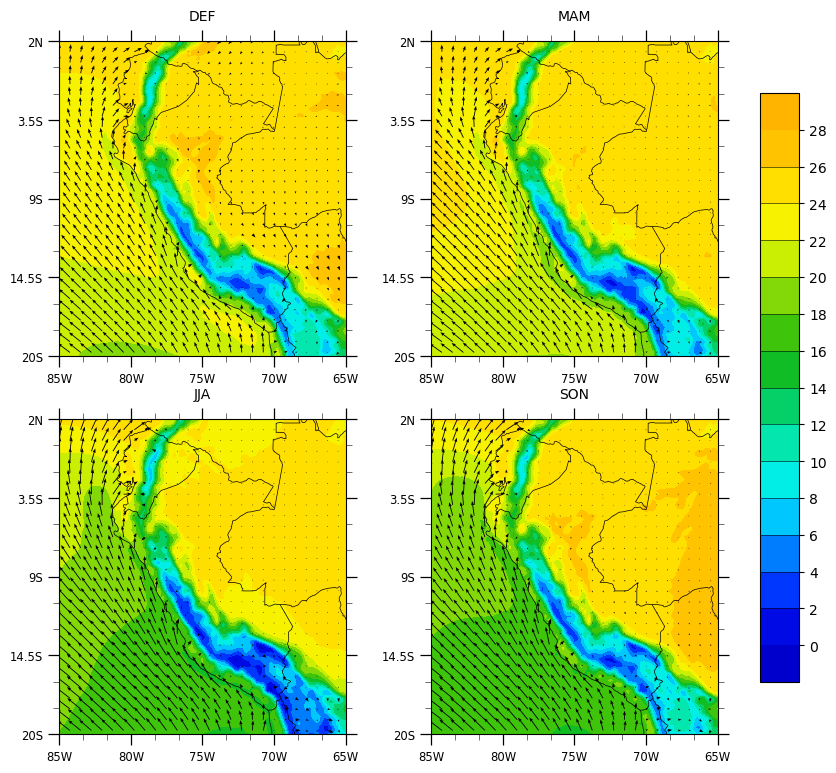

In [11]:
fig = plt.figure(figsize=(11, 9))

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# Seleccionamos la proyección de nuestro mapa
proj = ccrs.PlateCarree()

# Agregar las subfiguras
ax1 = fig.add_subplot(grid[0, 0], projection=proj)  # 
ax2 = fig.add_subplot(grid[0, 1], projection=proj)  # 
ax3 = fig.add_subplot(grid[1, 0], projection=proj)  # 
ax4 = fig.add_subplot(grid[1, 1], projection=proj)  # 

for (ax, title) in [(ax1, 'DEF'), (ax2, 'MAM'), (ax3, 'JJA'), (ax4, 'SON')]:
    # Use la función de geocat.viz.util para establecer los valores de marca de los ejes
    gv.set_axes_limits_and_ticks(ax=ax,
                                 xlim=(lon.min(), lon.max()),
                                 ylim=(lat.min(), lat.max()),
                                 xticks=np.linspace(lon.min(), lon.max(), 5),
                                 yticks=np.linspace(lat.min(), lat.max(), 5))

    # Usamos la función geocat.viz.util para hacer que los gráficos se vean como NCL
    # gráficos usando etiquetas de marca de latitud y longitud
    gv.add_lat_lon_ticklabels(ax)

    # Eliminar el símbolo de grado de las etiquetas de marca
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    # Usamos la función de geocat.viz.util para agregar marcas menores y mayores
    gv.add_major_minor_ticks(ax)

    # Agregar las lines de costa
    ax.add_feature(cf.BORDERS, edgecolor='k', linewidth=0.5)
    ax.coastlines(linewidth=0.5, edgecolor='k')

    # Agregar título central
    ax.set_title(title, loc='center', y=1.04, fontsize=10)

# Select an appropriate colormap
#cmap = 'magma'
import cmaps
# Importando la base del colormap para trabajar
cmap = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                            minval=0.1,
                            maxval=0.6,
                            n=len(np.arange(0, 30, 2)))

# Agregamos los campos de temperatura y viento

C = ax1.contourf(lon,
                 lat,
                 DEF.values,
                 levels=np.arange(0, 30, 2),
                 cmap=cmap,
                 extend='both')

ax1.quiver(lon[::3,::3],
            lat[::3,::3],
            UDEF[::3,::3],
            VDEF[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

ax2.contourf(lon,
             lat,
             MAM.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax2.quiver(lon[::3,::3],
            lat[::3,::3],
            UMAM[::3,::3],
            VMAM[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

ax3.contourf(lon,
             lat,
             JJA.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax3.quiver(lon[::3,::3],
            lat[::3,::3],
            UJJA[::3,::3],
            VJJA[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

ax4.contourf(lon,
             lat,
             SON.values,
             levels=np.arange(0, 30, 2),
             cmap=cmap,
             extend='both')

ax4.quiver(lon[::3,::3],
            lat[::3,::3],
            USON[::3,::3],
            VSON[::3,::3],
            color='black',
            width=.003,
            scale=120.,
            headwidth=3.75,
            zorder=4)

# Agregamos el colorbars
# Al especificar dos ejes para `ax`, la barra de colores abarcará ambos
plt.colorbar(C,
             ax=[ax1, ax2, ax3, ax4],
             ticks=range(0, 30, 2),
             extendrect=True,
             extendfrac='auto',
             shrink=0.85,
             aspect=15,
             drawedges=True)

fig.savefig('fig/Temp_UV_estacional.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)

## Podemos sacar los promedios

In [12]:
df = ds.mean(('latitude', 'longitude')).to_dataframe()
df['t2m'] = df['t2m'] - 273.16
df

,z,u10,v10,t2m,tp
season,,,,,
DJF,6090.311523,-0.871326,1.267192,21.731079,0.005422
JJA,6090.311523,-1.093828,2.078324,19.492767,0.002653
MAM,6090.311523,-1.186946,1.595457,21.499115,0.005034
SON,6090.311523,-0.919692,1.852024,20.191010,0.003629
